In [1]:
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp
import healpy.newvisufunc as nv
from matplotlib.colors import ListedColormap
from math import *

In [2]:
#CMB COLORMAP AVAILABLE FROM https://github.com/zonca/paperplots/raw/master/data/Planck_Parchment_RGB.txt
cPlanck = ListedColormap(np.loadtxt("Planck_Parchment_RGB.txt")/255.)
cPlanck.set_bad("gray")    #MISSING PIXELS
cPlanck.set_under("white") #BACKGROUND

In [67]:
# Unit conversion
def cm2inch(cm):
    """Centimeters to inches"""
    return cm/2.54

# Bins
def binned(l, Cl):
    """Compute average ell, power, and variance in a bin."""
    
    P = np.sum((2*l+1)*Cl)
    N = np.sum(2*l+1)
    L = np.sum(l)
    return L/len(l), P/N, sqrt(np.sum((2*l+1)*(Cl-P/N)**2)/(N-1))

# Logarithmic binning
def logbin(l, Cl, bands=100):
    """Bin spectrum data in logarithmically spaced bins."""
    
    n = len(l)
    delta = np.exp(np.log(l[-1]/max(l[0],2.0))/bands) - 1.0
    
    i = 0
    data  = []
    bins  = []
    sigma = []
    
    while (i < n):
        s = min(2*int(l[i]*delta) + 1, n-i)
        b, v, w = binned(l[i:i+s], Cl[i:i+s])
        bins.append(b)
        data.append(v)
        sigma.append(w)
        i += s
    
    return np.array(bins), np.array(data), np.array(sigma)

# Smoothing
def smooth(y, window_size):
    """Gaussian smoothing of 1D arrays"""
    dx = 6.0 / window_size
    x  = np.arange(-3.0, 3.0, dx)
    w  = np.exp(-x**2/2)

    return np.convolve(w/sum(w), y, mode="same")

In [3]:
inp = hp.read_map("input.fits", field=0)

imf1 = hp.read_map("imf1.fits", field=0)
imf2 = hp.read_map("imf2.fits", field=0)
imf3 = hp.read_map("imf3.fits", field=0)
imf4 = hp.read_map("imf4.fits", field=0)
imf5 = hp.read_map("imf5.fits", field=0)
imf6 = hp.read_map("imf6.fits", field=0)
imf7 = hp.read_map("imf7.fits", field=0)
imf8 = hp.read_map("imf8.fits", field=0)

res1 = hp.read_map("res1.fits", field=0)
res2 = hp.read_map("res2.fits", field=0)
res3 = hp.read_map("res3.fits", field=0)
res4 = hp.read_map("res4.fits", field=0)
res5 = hp.read_map("res5.fits", field=0)
res6 = hp.read_map("res6.fits", field=0)
res7 = hp.read_map("res7.fits", field=0)
res8 = hp.read_map("res8.fits", field=0)

In [19]:
LMAX = 3*512-1

# Grid
l = np.arange(LMAX+1)

# Angular power spectrum
cl_inp  = hp.anafast(inp,  lmax=LMAX)
cl_imf1 = hp.anafast(imf1, lmax=LMAX)
cl_imf2 = hp.anafast(imf2, lmax=LMAX)
cl_imf3 = hp.anafast(imf3, lmax=LMAX)
cl_imf4 = hp.anafast(imf4, lmax=LMAX)
cl_imf5 = hp.anafast(imf5, lmax=LMAX)
cl_imf6 = hp.anafast(imf6, lmax=LMAX)
cl_imf7 = hp.anafast(imf7, lmax=LMAX)
cl_imf8 = hp.anafast(imf8, lmax=LMAX)
cl_res1 = hp.anafast(res1, lmax=LMAX)
cl_res2 = hp.anafast(res2, lmax=LMAX)
cl_res3 = hp.anafast(res3, lmax=LMAX)
cl_res4 = hp.anafast(res4, lmax=LMAX)
cl_res5 = hp.anafast(res5, lmax=LMAX)
cl_res6 = hp.anafast(res6, lmax=LMAX)
cl_res7 = hp.anafast(res7, lmax=LMAX)
cl_res8 = hp.anafast(res8, lmax=LMAX)
cl_emd  = hp.anafast(imf1+imf2+imf3+imf4+imf5+imf6+imf7+imf8+res8, lmax=LMAX)

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(l, cl_inp  * l*(l+1) / (2*np.pi), 'brown')
plt.plot(l, cl_emd  * l*(l+1) / (2*np.pi), 'black')
plt.plot(l, cl_imf1 * l*(l+1) / (2*np.pi), 'red')
plt.plot(l, cl_imf2 * l*(l+1) / (2*np.pi), 'darkred')
plt.plot(l, cl_imf3 * l*(l+1) / (2*np.pi), 'green')
plt.plot(l, cl_imf4 * l*(l+1) / (2*np.pi), 'darkgreen')
plt.plot(l, cl_imf5 * l*(l+1) / (2*np.pi), 'blue')
plt.plot(l, cl_imf6 * l*(l+1) / (2*np.pi), 'darkblue')
plt.plot(l, cl_imf7 * l*(l+1) / (2*np.pi), 'orange')
plt.plot(l, cl_imf8 * l*(l+1) / (2*np.pi), 'darkorange')
plt.plot(l, cl_res8 * l*(l+1) / (2*np.pi), 'gold')
plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)C_{\ell}/2\pi$")
plt.xlim([0, 500])
plt.grid()

# plt.savefig('comparison.pdf', dpi=600, bbox_inches='tight')

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(l, cl_inp  * l*(l+1) / (2*np.pi), 'brown')
plt.plot(l, cl_emd  * l*(l+1) / (2*np.pi), 'black')
plt.plot(l, cl_res1 * l*(l+1) / (2*np.pi), 'red')
plt.plot(l, cl_res2 * l*(l+1) / (2*np.pi), 'darkred')
plt.plot(l, cl_res3 * l*(l+1) / (2*np.pi), 'green')
plt.plot(l, cl_res4 * l*(l+1) / (2*np.pi), 'darkgreen')
plt.plot(l, cl_res5 * l*(l+1) / (2*np.pi), 'blue')
plt.plot(l, cl_res6 * l*(l+1) / (2*np.pi), 'darkblue')
plt.plot(l, cl_res7 * l*(l+1) / (2*np.pi), 'orange')
plt.plot(l, cl_res8 * l*(l+1) / (2*np.pi), 'darkorange')
plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)C_{\ell}/2\pi$")
plt.xlim([0, 500])
plt.grid()

# plt.savefig('comparison.pdf', dpi=600, bbox_inches='tight')

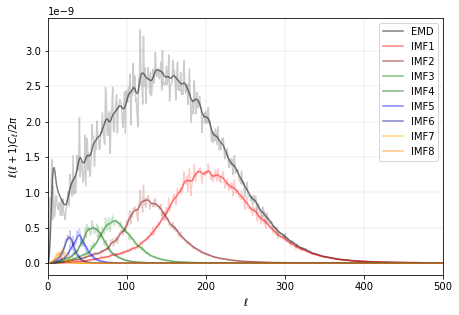

In [72]:
size  = 15
alph1 = 0.2
alph2 = 0.5

width  = 18
aspect = 1.5

fig = plt.figure(figsize=(cm2inch(width), cm2inch(width/aspect)), frameon=True)

plt.plot(l, cl_emd  * l*(l+1) / (2.0*np.pi), 'black', label='', alpha=alph1)
plt.plot(l, cl_imf1 * l*(l+1) / (2.0*np.pi), 'red', label='', alpha=alph1)
plt.plot(l, cl_imf2 * l*(l+1) / (2.0*np.pi), 'darkred', label='', alpha=alph1)
plt.plot(l, cl_imf3 * l*(l+1) / (2.0*np.pi), 'green', label='', alpha=alph1)
plt.plot(l, cl_imf4 * l*(l+1) / (2.0*np.pi), 'darkgreen', label='', alpha=alph1)
plt.plot(l, cl_imf5 * l*(l+1) / (2.0*np.pi), 'blue', label='', alpha=alph1)
plt.plot(l, cl_imf6 * l*(l+1) / (2.0*np.pi), 'darkblue', label='', alpha=alph1)
plt.plot(l, cl_imf7 * l*(l+1) / (2.0*np.pi), 'orange', label='', alpha=alph1)
plt.plot(l, cl_imf8 * l*(l+1) / (2.0*np.pi), 'darkorange', label='', alpha=alph1)

plt.plot(l, smooth(cl_emd,  size) * l*(l+1) / (2.0*np.pi), 'black', label='EMD', alpha=alph2)
plt.plot(l, smooth(cl_imf1, size) * l*(l+1) / (2.0*np.pi), 'red', label='IMF1', alpha=alph2)
plt.plot(l, smooth(cl_imf2, size) * l*(l+1) / (2.0*np.pi), 'darkred', label='IMF2', alpha=alph2)
plt.plot(l, smooth(cl_imf3, size) * l*(l+1) / (2.0*np.pi), 'green', label='IMF3', alpha=alph2)
plt.plot(l, smooth(cl_imf4, size) * l*(l+1) / (2.0*np.pi), 'darkgreen', label='IMF4', alpha=alph2)
plt.plot(l, smooth(cl_imf5, size) * l*(l+1) / (2.0*np.pi), 'blue', label='IMF5', alpha=alph2)
plt.plot(l, smooth(cl_imf6, size) * l*(l+1) / (2.0*np.pi), 'darkblue', label='IMF6', alpha=alph2)
plt.plot(l, smooth(cl_imf7, size) * l*(l+1) / (2.0*np.pi), 'orange', label='IMF7', alpha=alph2)
plt.plot(l, smooth(cl_imf8, size) * l*(l+1) / (2.0*np.pi), 'darkorange', label='IMF8', alpha=alph2)

plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)C_{\ell}/2\pi$")
plt.xlim([0, 500])
plt.grid(True, which="both", axis="both", linestyle='-', linewidth=0.2)
plt.legend(loc='upper right', ncol=1, frameon=True)

plt.savefig('IMF_spectra.pdf', dpi=1000, bbox_inches='tight')

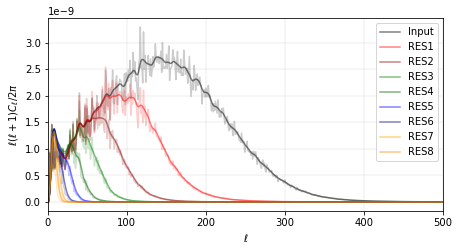

In [73]:
size  = 15
alph1 = 0.2
alph2 = 0.5

width  = 18
aspect = 2

fig = plt.figure(figsize=(cm2inch(width), cm2inch(width/aspect)), frameon=True)

plt.plot(l, cl_inp  * l*(l+1) / (2.0*np.pi), 'black', label='', alpha=alph1)
plt.plot(l, cl_res1 * l*(l+1) / (2.0*np.pi), 'red', label='', alpha=alph1)
plt.plot(l, cl_res2 * l*(l+1) / (2.0*np.pi), 'darkred', label='', alpha=alph1)
plt.plot(l, cl_res3 * l*(l+1) / (2.0*np.pi), 'green', label='', alpha=alph1)
plt.plot(l, cl_res4 * l*(l+1) / (2.0*np.pi), 'darkgreen', label='', alpha=alph1)
plt.plot(l, cl_res5 * l*(l+1) / (2.0*np.pi), 'blue', label='', alpha=alph1)
plt.plot(l, cl_res6 * l*(l+1) / (2.0*np.pi), 'darkblue', label='', alpha=alph1)
plt.plot(l, cl_res7 * l*(l+1) / (2.0*np.pi), 'orange', label='', alpha=alph1)
plt.plot(l, cl_res8 * l*(l+1) / (2.0*np.pi), 'darkorange', label='', alpha=alph1)

plt.plot(l, smooth(cl_inp,  size) * l*(l+1) / (2.0*np.pi), 'black', label='Input', alpha=alph2)
plt.plot(l, smooth(cl_res1, size) * l*(l+1) / (2.0*np.pi), 'red', label='RES1', alpha=alph2)
plt.plot(l, smooth(cl_res2, size) * l*(l+1) / (2.0*np.pi), 'darkred', label='RES2', alpha=alph2)
plt.plot(l, smooth(cl_res3, size) * l*(l+1) / (2.0*np.pi), 'green', label='RES3', alpha=alph2)
plt.plot(l, smooth(cl_res4, size) * l*(l+1) / (2.0*np.pi), 'darkgreen', label='RES4', alpha=alph2)
plt.plot(l, smooth(cl_res5, size) * l*(l+1) / (2.0*np.pi), 'blue', label='RES5', alpha=alph2)
plt.plot(l, smooth(cl_res6, size) * l*(l+1) / (2.0*np.pi), 'darkblue', label='RES6', alpha=alph2)
plt.plot(l, smooth(cl_res7, size) * l*(l+1) / (2.0*np.pi), 'orange', label='RES7', alpha=alph2)
plt.plot(l, smooth(cl_res8, size) * l*(l+1) / (2.0*np.pi), 'darkorange', label='RES8', alpha=alph2)

plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)C_{\ell}/2\pi$")
plt.xlim([0, 500])
plt.grid(True, which="both", axis="both", linestyle='-', linewidth=0.2)
plt.legend(loc='upper right', ncol=1, frameon=True)

plt.savefig('RES_spectra.pdf', dpi=1000, bbox_inches='tight')